In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [41]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [42]:
data.index = pd.to_datetime(data.index)

In [43]:
data.dropna(inplace = True)

In [44]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [45]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [46]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_out.iloc[:,1:]
y_hold = data_out.iloc[:,0]

In [47]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out)
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [48]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph for your model

In [22]:
import matplotlib.pyplot as plt

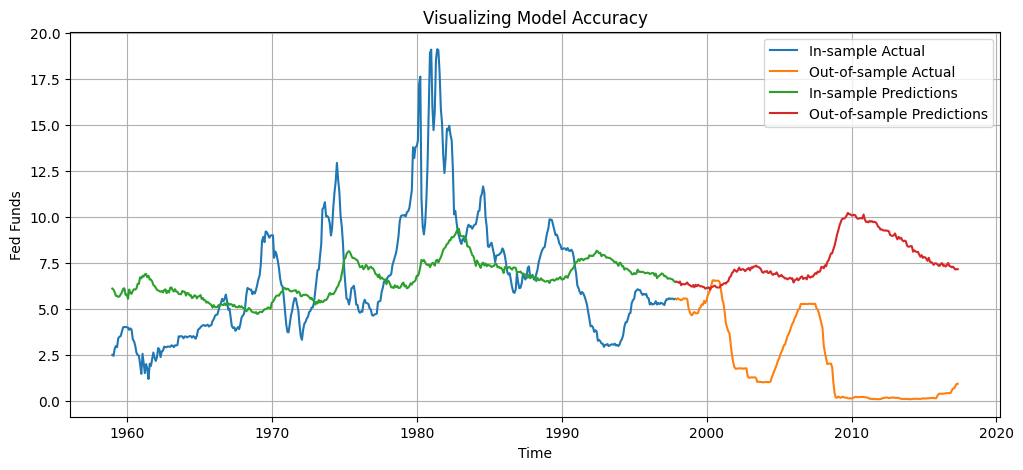

In [49]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(['In-sample Actual', 'Out-of-sample Actual', 'In-sample Predictions', 'Out-of-sample Predictions'])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [50]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [51]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [52]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566723


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
max_degrees = 3

DEGREE :  1


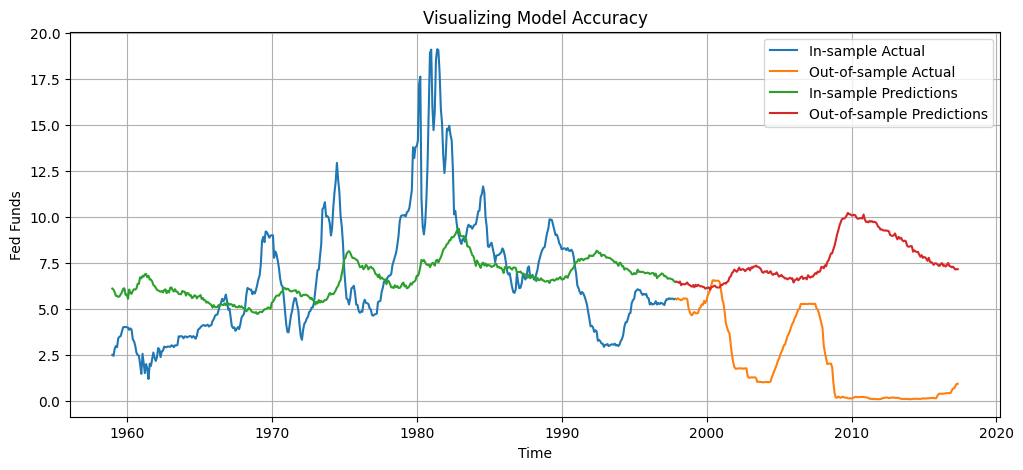

Insample MSE :  10.071422013168643
Outsample MSE :  40.36082783566789
DEGREE :  2


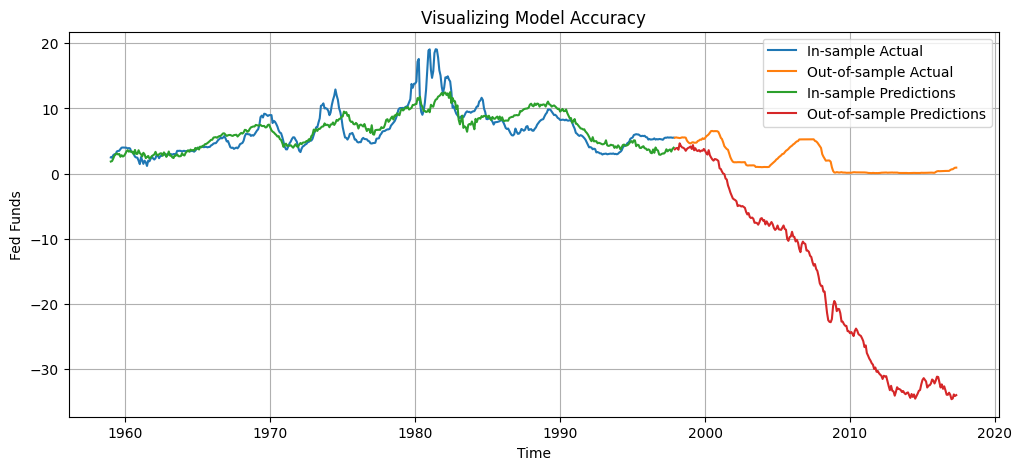

Insample MSE :  3.8634771392760694
Outsample MSE :  481.4465099288575
DEGREE :  3


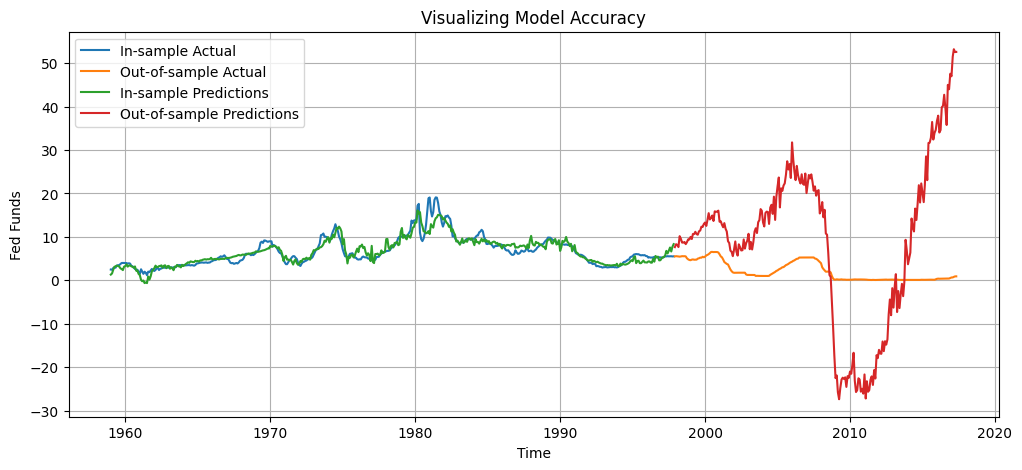

Insample MSE :  1.8723636270283275
Outsample MSE :  371.7676706654165


In [54]:
for degrees in range(1, max_degrees+1):
    print('DEGREE : ', degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))
    
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    
    pred_out = model1.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)

    ###
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(pred_in)
    plt.plot(pred_out)
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(['In-sample Actual', 'Out-of-sample Actual', 'In-sample Predictions', 'Out-of-sample Predictions'])
    plt.grid()
    plt.show()
    
    in_mse_1 = metrics.mean_squared_error(y_in, model1.predict(X_in_poly))
    out_mse_1 = metrics.mean_squared_error(y_out, model1.predict(X_out_poly))
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

As the complexity of the model increases, the in-sample MSE decreases, meaning that the bias gets reduced as the model fits better. However, the model captures noise in the training data and leads to high variance in high complexity models, leading to poorer generalization to out-of sample data. 